<a href="https://colab.research.google.com/github/jcval94/Out-of-the-box/blob/master/Distribuciones_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import seaborn as sns
from tensorflow.keras.layers import Input, Concatenate
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.layers import LSTM 
from sklearn.model_selection import train_test_split

from random import seed
from sklearn import mixture
from scipy import stats

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.layers import Conv2D,Conv1D
from tensorflow.keras.callbacks import TensorBoard
import datetime
import copy

plt.style.use('ggplot')

## Creacion de las normales

In [ ]:
COLS = list(range(0,500))+['mu','sigma']
df = pd.DataFrame(columns=COLS)

for i in range(250):
  mu, sigma = np.random.uniform(low=0, high=100, size=2)
  s = np.random.normal(mu, sigma, 500)
  df_length = len(df)
  df.loc[df_length] = list(sorted(np.random.normal(mu, sigma, 500)))+[mu, sigma]

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,mu,sigma
0,-231.875770,-173.587302,-155.568623,-152.850495,-147.807584,-138.981182,-122.604171,-120.710300,-118.835201,-114.532713,-110.050628,-109.876426,-107.619345,-106.341567,-101.982181,-99.819447,-99.187108,-96.797218,-94.665354,-93.873102,-92.420880,-89.845219,-86.123285,-85.934167,-84.289247,-83.242994,-81.121034,-79.321093,-75.725253,-75.020625,-74.456260,-74.186505,-72.588247,-72.333425,-71.476347,-69.594845,-68.419973,-66.965758,-66.384822,-65.665162,...,178.278710,178.540783,180.509803,181.481320,182.482401,183.341923,185.116707,185.286957,185.401020,186.424404,189.634687,189.822573,192.181588,192.621176,194.017032,195.052259,196.403174,198.530497,204.069308,205.544635,206.317391,209.157149,213.052378,219.975092,220.144689,223.159905,225.430026,226.548881,229.681352,231.059244,233.650872,235.888419,244.121716,248.804111,249.467989,249.869567,253.901982,264.078592,52.310942,81.733804
1,44.598340,44.868848,46.470068,46.997141,50.709749,52.394758,52.737158,53.715318,53.820094,54.315819,54.976789,55.437180,56.117820,56.136924,56.463114,56.535956,56.948707,57.451359,58.011100,58.547260,59.050270,59.418947,59.602768,59.659463,59.758283,60.005331,60.067608,60.182278,60.257513,60.453536,60.506531,60.587673,60.809435,61.036397,61.053102,61.055808,61.307553,61.427498,61.527865,61.613216,...,103.496999,103.731737,103.778555,104.198811,104.247468,104.281451,104.377614,104.711410,104.766196,104.835724,105.293232,105.719741,105.833140,106.048760,106.299513,106.348955,106.434766,106.895754,107.196939,107.744327,107.771742,107.799388,107.887360,108.093898,108.800930,109.450632,109.654990,110.538511,110.803358,111.267497,112.406315,115.514339,115.533611,116.255248,117.429891,118.673012,119.277100,123.572610,81.457765,14.262481
2,-140.176873,-127.370629,-93.022477,-85.386173,-84.826716,-82.086977,-79.218740,-77.026220,-74.655661,-73.867896,-73.483263,-71.133547,-70.613645,-70.440922,-67.308760,-63.305845,-59.422333,-56.124257,-55.997272,-53.629203,-51.136346,-50.642359,-50.369175,-46.808368,-45.838231,-44.066720,-43.842058,-42.963739,-41.759196,-41.730768,-40.513945,-40.322304,-40.269459,-39.464627,-39.283159,-39.163805,-39.149313,-39.077647,-38.972333,-38.384698,...,153.264900,153.305474,154.055537,156.325827,159.002563,159.371308,160.363513,160.657703,163.169843,163.601414,163.607307,165.083112,165.110599,165.712650,166.422065,166.486429,172.229920,172.983976,173.819336,177.157495,179.110450,179.389862,180.524263,184.448149,186.204401,186.295101,188.332096,191.196900,194.537387,194.758001,196.271021,207.624134,216.649671,219.240156,222.594700,230.886406,245.028981,246.002968,55.356579,65.076517
3,-182.895177,-155.922130,-152.179332,-146.655019,-135.745765,-133.946998,-123.903153,-123.312154,-120.799837,-119.536478,-118.641225,-118.109934,-116.783976,-115.594022,-113.322964,-110.502840,-109.078290,-107.797678,-105.010565,-104.279524,-102.775262,-101.709899,-100.447255,-100.086149,-97.957782,-95.634043,-95.248626,-93.065981,-91.078452,-89.039778,-88.085817,-87.444478,-86.732303,-86.286643,-85.265022,-85.203689,-84.463930,-84.009050,-83.866639,-82.763114,...,122.619336,124.673832,124.696558,126.585834,126.695649,128.639757,128.689682,128.705515,128.713935,131.420579,132.893350,133.186204,137.254507,137.943944,138.079699,143.946416,145.350914,153.928362,155.094412,155.247640,158.742352,160.630842,164.069611,164.655346,165.226010,165.333424,166.826693,169.444143,175.886041,176.402701,176.514339,177.081139,181.406158,192.158326,195.098566,201.878677,207.155368,230.224159,23.885990,69.510622
4,-124.567355,-115.462340,-108.000055,-97.886882,-97.198847,-85.442783,-80.953444,-74.628021,-63.723993,-60.737459,-57.587716,-57.381563,-54.127645,-52.712469,-50.147142,-49.213284,-48.74

In [ ]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:499]
y = df.iloc[:,501]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 499)               249500    
_________________________________________________________________
dense_20 (Dense)             (None, 50)                25000     
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 255       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 6         
Total params: 274,761
Trainable params: 274,761
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(X_train, y_train, epochs=25, verbose=1, validation_split=0.2)
predictions = model.predict(X_test)

Epoch 1/25
5/5 [==============================] - 1s 77ms/step - loss: 7902.9572 - mse: 7902.9572 - mae: 62.7063 - val_loss: 2389.8730 - val_mse: 2389.8730 - val_mae: 40.8068
Epoch 2/25
5/5 [==============================] - 0s 12ms/step - loss: 997.2871 - mse: 997.2871 - mae: 25.7668 - val_loss: 564.6411 - val_mse: 564.6411 - val_mae: 18.8505
Epoch 3/25
5/5 [==============================] - 0s 12ms/step - loss: 736.3344 - mse: 736.3344 - mae: 21.9823 - val_loss: 545.2746 - val_mse: 545.2746 - val_mae: 21.1791
Epoch 4/25
5/5 [==============================] - 0s 13ms/step - loss: 263.6153 - mse: 263.6153 - mae: 13.6588 - val_loss: 496.6542 - val_mse: 496.6542 - val_mae: 19.8605
Epoch 5/25
5/5 [==============================] - 0s 13ms/step - loss: 221.4394 - mse: 221.4394 - mae: 11.5343 - val_loss: 329.9279 - val_mse: 329.9279 - val_mae: 15.6407
Epoch 6/25
5/5 [==============================] - 0s 14ms/step - loss: 147.0811 - mse: 147.0811 - mae: 10.1671 - val_loss: 87.9902 - val_mse:

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


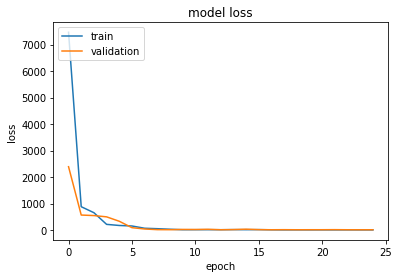

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(mean_absolute_error(y_test, predictions))
print(mean_squared_error(y_test, predictions))

1.2074146826842784
3.2280692612372146


In [ ]:
resul = pd.DataFrame(columns=['y_test','pred'])
resul['y_test'] = y_test
resul['pred'] = predictions
resul

,y_test,pred
142,11.749781,12.234631
6,3.034525,3.550919
97,16.705008,16.074200
60,39.379640,42.008999
112,65.606123,68.294640
...,...,...
79,53.927495,58.269737
86,18.110482,18.766750
5,65.007505,64.065269
56,77.731294,78.188873


# Modelo bimodal

In [ ]:
import numpy as np
import pandas as pd
COLS = list(range(0,500))+['mu_1','sigma_1','mu_2','sigma_2']
df = pd.DataFrame(columns=COLS)

for i in range(2000):
  mu1, sigma1 = np.random.uniform(low=0, high=100, size=2)
  mu2, sigma2 = np.random.uniform(low=0, high=100, size=2)
  s1 = np.random.normal(mu1, sigma1, 250).tolist()
  s2 = np.random.normal(mu2, sigma2, 250).tolist()
  df_length = len(df)
  df.loc[df_length] = list(sorted(s1+s2))+[mu1, sigma1, mu2, sigma2]

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,mu_1,sigma_1,mu_2,sigma_2
0,-177.838787,-158.704598,-144.617589,-142.925563,-126.626831,-122.079171,-102.796082,-100.277662,-98.538949,-93.936883,-93.740928,-93.411072,-92.662739,-91.299816,-90.677680,-87.389579,-86.243179,-78.803996,-78.131312,-76.650131,-73.798062,-70.856421,-70.771997,-69.312171,-67.547979,-67.266274,-58.531951,-56.868226,-55.706469,-52.935557,-51.106676,-50.033885,-49.916654,-48.619553,-47.078243,-46.599675,-45.585765,-45.315831,-45.021067,-44.974154,...,168.606394,168.893910,169.608627,171.999370,172.650268,173.306417,176.838578,177.770482,180.284245,182.880569,186.538069,190.345963,190.975857,195.588352,197.852964,199.765300,202.939375,203.670093,204.016845,208.973334,209.498543,209.517890,212.302741,217.220910,221.656011,223.260230,224.792052,225.261194,227.124660,227.428251,241.971976,249.079875,251.793267,253.238935,295.310935,329.453319,67.312227,98.830371,32.527680,40.856168
1,-154.859059,-140.276017,-127.468367,-119.486864,-115.737839,-115.611283,-115.522591,-114.247552,-107.668377,-105.094939,-97.244864,-96.593885,-88.017565,-83.668585,-83.251777,-77.178257,-75.982363,-71.448066,-70.247725,-70.113306,-68.440326,-67.604509,-65.283520,-64.160828,-63.191135,-62.420612,-61.868774,-60.397836,-60.066127,-59.999455,-56.269295,-55.997409,-49.398186,-47.394271,-47.054787,-46.743931,-46.276293,-44.330952,-42.237798,-41.768959,...,177.744150,179.381525,180.080237,180.559316,182.402612,185.094956,186.049049,187.147783,188.204999,190.316370,190.438979,192.939993,193.065709,193.620319,196.986163,197.066018,197.400910,198.361883,198.602697,202.498070,204.228367,206.614584,207.153192,207.898475,210.265517,216.740070,217.240663,224.048965,227.142197,230.607667,233.053198,253.366092,258.361247,263.682013,279.354326,302.752717,92.159835,69.303923,34.398838,68.212969
2,-200.513063,-191.306822,-171.814888,-164.425347,-161.372599,-142.723952,-141.898334,-139.120511,-135.226281,-132.350475,-131.657780,-131.535600,-128.711730,-128.633865,-126.216078,-124.460410,-122.420172,-121.962720,-115.604714,-115.501919,-111.435556,-110.487132,-108.301129,-108.075247,-107.825989,-106.370198,-100.063941,-99.799186,-96.997430,-96.776312,-94.562158,-93.035637,-92.968376,-91.544844,-90.548470,-90.206284,-85.108905,-84.646006,-84.487419,-83.512432,...,120.172902,120.482254,120.635486,121.864046,122.173055,122.464996,122.691430,123.349475,123.559928,124.674953,124.694796,124.952461,125.996473,129.076381,131.441556,131.776060,134.925172,134.930318,142.724840,144.083957,144.934523,147.880621,149.839345,154.248770,154.610863,162.076819,164.173222,165.820541,171.143462,172.945365,174.066782,177.175874,182.111974,192.392525,198.331244,209.666945,10.773412,80.141268,6.246601,60.125517
3,6.441129,11.701413,13.813365,14.287768,15.359360,16.838287,16.922031,17.940724,18.417799,19.510795,20.072552,20.120112,20.379100,20.401947,20.523653,20.626036,20.853425,20.942132,21.120282,21.128708,21.151392,21.452292,21.528061,21.536409,21.644188,21.727425,21.762735,21.897366,22.045491,22.188374,22.189412,22.192010,22.248228,22.309873,22.377032,22.469222,22.560045,22.600166,22.642573,22.716462,...,95.767430,95.854404,96.166190,96.564778,96.608848,97.084942,97.731614,98.019514,98.515768,98.921186,99.079727,99.191248,99.415051,100.775945,100.875764,100.989319,101.580778,102.132594,102.410852,103.489405,103.882427,104.794296,105.445070,107.503297,107.503910,107.961662,109.817301,110.696873,113.971494,116.157401,118.299225,118.992820,121.953499,124.844297,127.790856,134.914006,71.986517,24.960116,25.541751,3.301556
4,-237.205591,-235.215277,-199.863674,-194.552015,-175.607582,-172.509007,-171.747717,-169.906881,-165.254310,-161.148734,-155.798926,-152.952767,-146.147102,-145.756000,-145.017327,-142.804496,-136

In [ ]:
X = df.iloc[:,:(len(df.columns)-4)]
y = df.iloc[:,(len(df.columns)-4):]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# GAUSSIAN (GRUPO DE CONTROL)

In [ ]:
seed(111)

In [ ]:
def resul(x1, x2):
  pval_ad = stats.anderson_ksamp([x1,x2]).significance_level
  pval_ks = stats.ks_2samp(x1, x2).pvalue
  return (pval_ad, pval_ks)

pvals1 = []
pvals2 = []
for i in range(len(y_test)):
  muestra = X_test.iloc[i,:500]
  # X = np.array([[0, a] for a in muestra])
  gmm = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(np.asarray(muestra).reshape(-1,1))
  # gmm.means_ gmm.covariances_
  dpgmm = mixture.BayesianGaussianMixture(n_components=2,
                                          covariance_type='full').fit(np.asarray(muestra).reshape(-1,1))

  parms = y_test.iloc[i,:]
  m1, s1, m2, s2 = (parms[0], parms[1], parms[2],parms[3])
  x1 = np.random.normal(m1, s1,size=1000).tolist() + np.random.normal(m2, s2,size=1000).tolist()
  
  m1, m2 = gmm.means_
  s1, s2 = gmm.covariances_
  x2 = np.random.normal(m1[0], np.sqrt(s1[0]),size=1000).tolist() + np.random.normal(m2[0], np.sqrt(s2[0]),size=1000).tolist()
  pvals1.append(resul(x1, x2))
  
  m1, m2 = dpgmm.means_
  s1, s2 = dpgmm.covariances_
  x2 = np.random.normal(m1[0], np.sqrt(s1[0]),size=1000).tolist() + np.random.normal(m2[0], np.sqrt(s2[0]),size=1000).tolist()
  
  pvals2.append(resul(x1, x2))

/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: p-value floored: true value smaller than 0.001
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: p-value floored: true value smaller than 0.001
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: p-value floored: true value smaller than 0.001
  
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: p-value floored: true value smaller than 0.001
 

In [ ]:
#GRupo de control
pd.DataFrame({'AD': [x[0] for x in pvals1], 'KS': [x[1] for x in pvals1]}).describe()

,AD,KS
count,660.000000,6.600000e+02
mean,0.048198,1.016776e-01
std,0.086465,2.157655e-01
min,0.001000,9.638080e-183
25%,0.001000,1.678535e-17
50%,0.001000,1.564415e-04
75%,0.041745,6.520388e-02
max,0.250000,9.976509e-01


In [ ]:
pd.DataFrame({'AD': [x[0] for x in pvals2], 'KS': [x[1] for x in pvals2]}).describe()

,AD,KS
count,660.000000,6.600000e+02
mean,0.075172,1.478085e-01
std,0.098535,2.367943e-01
min,0.001000,7.836345e-188
25%,0.001000,1.045852e-06
50%,0.012249,1.641475e-02
75%,0.150755,1.979604e-01
max,0.250000,9.932816e-01


## idea percentiles

In [ ]:
COLS = list(range(0,500*2-1))+['mu_1','sigma_1','mu_2','sigma_2']
df = pd.DataFrame(columns=COLS)

for i in range(2500):
  mu1, sigma1 = np.random.uniform(low=0, high=100, size=2)
  mu2, sigma2 = np.random.uniform(low=0, high=100, size=2)
  s1 = np.random.normal(mu1, sigma1, 250).tolist()
  s2 = np.random.normal(mu2, sigma2, 250).tolist()
  df_length = len(df)
  df.loc[df_length] = list(sorted(s1+s2)+list(np.diff(sorted(s1+s2))))+[mu1, sigma1, mu2, sigma2]

df.head()

In [ ]:
model = Sequential()
model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

# model.add(LSTM(128, input_shape=(X_train.shape[1],1), return_sequences=True))
# model.add(Dropout(0.2))

# model.add(LSTM(64, return_sequences=True))
# model.add(Dropout(0.1))
# model.add(BatchNormalization())
# model.add(Conv1D(filters=64, kernel_size=1,  activation='relu',input_shape=(X_train.shape[1],1)))

model.add(Dense(250, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(100, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='elu'))
model.add(Dense(10, activation='elu'))
model.add(Dense(4, activation='linear'))
# model.add(Dense(1, activation='softmax')) # mse: 3278.2609 - mae: 49.5778

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 999)               999000    
_________________________________________________________________
dense_22 (Dense)             (None, 250)               250000    
_________________________________________________________________
dense_23 (Dense)             (None, 100)               25100     
_________________________________________________________________
dense_24 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_25 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_26 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_27 (Dense)             (None, 4)                

In [ ]:

logdir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = TensorBoard(log_dir= logdir)

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit((X_train), y_train, #np.expand_dims
                  epochs=30, verbose=1,
                  validation_split=0.2,
                  callbacks=[tensorboard])
predictions = model.predict((X_test))

Epoch 1/30
42/42 [==============================] - 1s 11ms/step - loss: 1972.1358 - mse: 1972.1358 - mae: 34.7123 - val_loss: 603.1470 - val_mse: 603.1470 - val_mae: 20.0795
Epoch 2/30
42/42 [==============================] - 0s 4ms/step - loss: 531.6338 - mse: 531.6338 - mae: 18.6438 - val_loss: 439.6738 - val_mse: 439.6738 - val_mae: 17.2577
Epoch 3/30
42/42 [==============================] - 0s 4ms/step - loss: 476.8316 - mse: 476.8316 - mae: 17.7766 - val_loss: 478.4744 - val_mse: 478.4744 - val_mae: 17.9154
Epoch 4/30
42/42 [==============================] - 0s 4ms/step - loss: 451.8553 - mse: 451.8553 - mae: 17.4142 - val_loss: 486.3299 - val_mse: 486.3299 - val_mae: 18.1391
Epoch 5/30
42/42 [==============================] - 0s 4ms/step - loss: 483.6832 - mse: 483.6832 - mae: 17.9832 - val_loss: 433.6422 - val_mse: 433.6422 - val_mae: 17.0922
Epoch 6/30
42/42 [==============================] - 0s 5ms/step - loss: 459.2229 - mse: 459.2229 - mae: 17.6691 - val_loss: 432.0845 - va

In [ ]:
%load_ext tensorboard

In [ ]:
# !kill 1009
%tensorboard --logdir logs/fit

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


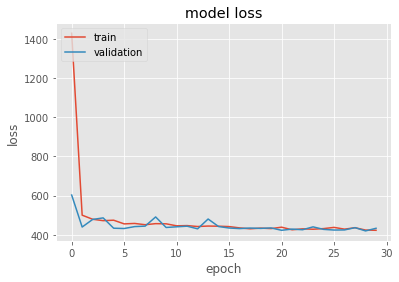

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
pvals = []  
  
for i in range(len(y_test)):
  parms = y_test.iloc[i,:]
  predictions[i]
  m1, s1, m2, s2 = (parms[0], parms[1], parms[2],parms[3])
  x1 = np.random.normal(m1, s1,size=1000).tolist() + np.random.normal(m2, s2,size=1000).tolist()
  m1, s1, m2, s2 = (predictions[i][0],predictions[i][1],predictions[i][2],predictions[i][3])
  x2 = np.random.normal(m1, s1,size=1000).tolist() + np.random.normal(m2, s2,size=1000).tolist()
  pvals.append(resul(x1, x2))


pd.DataFrame({'AD': [x[0] for x in pvals], 'KS': [x[1] for x in pvals]}).describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: p-value floored: true value smaller than 0.001
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: p-value capped: true value larger than 0.25
  


,AD,KS
count,825.000000,8.250000e+02
mean,0.005930,1.788679e-02
std,0.025262,6.791817e-02
min,0.001000,5.340475e-230
25%,0.001000,2.549041e-24
50%,0.001000,1.810074e-07
75%,0.001000,1.489409e-03
max,0.250000,8.187536e-01


In [ ]:
print(mean_absolute_error(y_test, [ln[0] for ln in predictions[0].tolist()]))
print(mean_squared_error(y_test, [ln[0] for ln in predictions[0].tolist()]))

In [ ]:
resul = pd.DataFrame(columns=['y_test','pred'])
resul['y_test'] = y_test
resul['pred'] = predictions
resul

# Idea por distribución

In [4]:
resultados = []
seed(111)
muestras = []
for i in range(2000):
  mu1, sigma1 = np.random.uniform(low=0, high=100, size=2)
  mu2, sigma2 = np.random.uniform(low=0, high=100, size=2)

  if mu1>mu2:
    mu1_ = copy.deepcopy(mu1)
    mu1 = copy.deepcopy(mu2)
    mu2 = copy.deepcopy(mu1_)
    sigma1_ = copy.deepcopy(sigma1)
    sigma1 = copy.deepcopy(sigma2)
    sigma2 = copy.deepcopy(sigma1_)

  s1 = np.random.normal(mu1, sigma1, 250).tolist()
  s2 = np.random.normal(mu2, sigma2, 250).tolist()
  valor = sorted(s1+s2)
  muestras.append(valor)
  resultados.append([mu1, sigma1, mu2, sigma2, abs(mu1-mu2)])

In [5]:
COLS = list(range(0,500*2-1))+['mu_1','sigma_1','mu_2','sigma_2']
df = pd.DataFrame(columns=COLS)

evidencia = []
for valor in muestras:
  dplot = sns.distplot(valor, kde=True, bins = 45)#, kde_kws={'bw':0.1}
  coords = dplot.get_lines()[0].get_data()
  
  smooth_d1 = np.gradient(coords[1])#gaussian_filter1d
  smooth_d2 = np.gradient(smooth_d1)
  maxis = sorted([(coords[1][i],coords[0][i]) for i in np.where(np.diff(np.sign(smooth_d1)))[0]], reverse=True)
  infls = sorted([(coords[1][i],coords[0][i]) for i in np.where(np.diff(np.sign(smooth_d2)))[0]], reverse=True)
  percentiles = np.percentile(valor,range(0,101))
  # gmm = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(np.asarray(valor).reshape(-1,1))
  # gmm.means_ gmm.covariances_

  plt.close()

  evidencia.append([valor,
                    coords[0],
                    coords[1],
                    np.asarray([item for item in maxis[:1][0]+infls[0]+infls[1]]+
                    [np.mean(valor), np.std(valor), stats.kurtosis(valor), len(maxis), len(infls)]),
                    percentiles
                    ])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

In [6]:
resultados_ = [[m1, s1, m2, s2] for m1, s1, m2, s2, difer in resultados]

X = evidencia.copy()
y = resultados_.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
def get_model_(hp):

  input0 = Input(shape=(len(valor),))
  input1 = Input(shape=(len(coords[1]),))
  input2 = Input(shape=(len(coords[1]),))
  input3 = Input(shape=(11,))
  input4 = Input(shape=(101,))
  inputs_ = [input0, input1, input2, input3, input4]
  merged = Concatenate(axis=1)(inputs_)

  x = Dense(hp.Int('input_units',min_value=32,max_value=256,step=16),
            input_dim=4, kernel_initializer='normal', 
            activation=hp.Choice('input_activation',values=['relu', 'elu', 'linear'],default='relu')
            )(merged)#, activation='sigmoid', use_bias=True

  for i in range(hp.Int('n_layers_1', 1, 8)):
    x = Dense(hp.Int('hidden_units_1',min_value=32,max_value=256,step=16), 
              activation = hp.Choice('dense_activation_1',values=['relu', 'elu', 'linear'],default='relu')
              )(x)

  for i in range(hp.Int('n_layers_2', 1, 4)):
    x = Dense(hp.Int('hidden_units_2',min_value=32,max_value=256,step=16), 
              activation = hp.Choice('dense_activation_2',values=['relu', 'elu', 'linear'],default='relu')
              )(x)

  for i in range(hp.Int('n_layers_3', 1, 4)):
    x = Dense(hp.Int('hidden_units_3',min_value=32,max_value=256,step=16), 
              activation = hp.Choice('dense_activation_3',values=['relu', 'elu', 'linear'],default='relu')
              )(x)
  
  output = Dense(4, activation=hp.Choice('dense_activation_4',values=['relu', 'elu', 'linear'],default='relu'))(x)

  model_m1 = keras.models.Model(inputs=inputs_, outputs=output)
  model_m1.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
  return model_m1
  
# get_model_().summary()

In [2]:
!pip install keras-tuner

     |████████████████████████████████| 71kB 6.0MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp36-none-any.whl size=78939 sha256=d62cf4f8db8bfcf73e7693650c3919c373ddc9fabcca270eccdcb35cb611ee82
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15358 sha256=5cbef86ab54f0af52aaac45c18692ccca608ddf1778a4d0269d6420558f846e9
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [3]:
import kerastuner
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import time
from kerastuner import Objective

In [8]:
inp0=[]
inp1=[]
inp3=[]
inp2=[]
inp4=[]

inp0_=[]
inp1_=[]
inp3_=[]
inp2_=[]
inp4_=[]

for a in X_train:
  inp0.append(a[0])#[float(item) for sublist in a[0] for item in sublist]
  inp1.append(a[1].tolist())
  inp2.append(a[2].tolist())
  inp3.append(a[3].tolist())
  inp4.append(a[4].tolist())

for a in X_test:
  inp0_.append(a[0])#[float(item) for sublist in a[0] for item in sublist])
  inp1_.append(a[1].tolist())
  inp2_.append(a[2].tolist())
  inp3_.append(a[3].tolist())
  inp4_.append(a[4].tolist())

inp0 = np.array(inp0)
inp1 = np.array(inp1)
inp2 = np.array(inp2)
inp3 = np.array(inp3)
inp4 = np.array(inp4)

inp0_ = np.array(inp0_)
inp1_ = np.array(inp1_)
inp2_ = np.array(inp2_)
inp3_ = np.array(inp3_)
inp4_ = np.array(inp4_)

outp1 = np.asarray(y_train)
outp2_ = np.asarray(y_test)
# print(len(inp1))
# print(len(inp2))
# print(len(inp3)) 
# print(len(outp1))

In [10]:
%%time

tuner_ = RandomSearch(
    get_model_,
    objective=Objective(name='mae', direction='min'),
    max_trials=15,  # how many model variations to test?
    executions_per_trial=4,  # how many trials per variation? (same model could perform differently)
    directory = f"{int(time.time())}")

tuner_.search(x=[inp0, inp1, inp2, inp3, inp4],
            y=outp1,
            verbose=2, # just slapping this here bc jupyter notebook. The console out was getting messy.
            epochs=50,
            batch_size=64,
            # callbacks=[tensorboard],  # if you have callbacks like tensorboard, they go here.
            validation_data=([inp0_, inp1_, inp2_, inp3_, inp4_], outp2_))

tuner_.results_summary(2)

Trial 15 Complete [00h 00m 33s]
mae: 5.329576253890991

Best mae So Far: 5.245044827461243
Total elapsed time: 00h 08m 12s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in 1608913945/untitled_project
Showing 2 best trials
Objective(name='mae', direction='min')
Trial summary
Hyperparameters:
input_units: 208
input_activation: elu
n_layers_1: 3
hidden_units_1: 64
dense_activation_1: elu
n_layers_2: 2
hidden_units_2: 80
dense_activation_2: relu
n_layers_3: 2
hidden_units_3: 80
dense_activation_3: relu
dense_activation_4: linear
Score: 5.245044827461243
Trial summary
Hyperparameters:
input_units: 112
input_activation: relu
n_layers_1: 1
hidden_units_1: 64
dense_activation_1: relu
n_layers_2: 2
hidden_units_2: 96
dense_activation_2: elu
n_layers_3: 1
hidden_units_3: 144
dense_activation_3: relu
dense_activation_4: elu
Score: 5.274468541145325
CPU times: user 8min 57s, sys: 35.7 s, total: 9min 33s
Wall time: 8min 13s


In [11]:
# %%time

# tuner = RandomSearch(
#     get_model_,
#     objective=Objective(name='mae', direction='min'),
#     max_trials=500,  # how many model variations to test?
#     executions_per_trial=4,  # how many trials per variation? (same model could perform differently)
#     directory = f"{int(time.time())}")

# tuner.search(x=[inp0, inp1, inp2, inp3, inp4],
#             y=outp1,
#             verbose=2, # just slapping this here bc jupyter notebook. The console out was getting messy.
#             epochs=50,
#             batch_size=64,
#             # callbacks=[tensorboard],  # if you have callbacks like tensorboard, they go here.
#             validation_data=([inp0_, inp1_, inp2_, inp3_, inp4_], outp2_))

# tuner.results_summary(2)

In [13]:
tuner = tuner_
lista_resul = []
for pars in tuner.oracle.get_best_trials(100):
  
  a = pars.hyperparameters.values
  a['score'] = pars.score
  lista_resul.append(a)

resul = pd.DataFrame(lista_resul)
resul

,input_units,input_activation,n_layers_1,hidden_units_1,dense_activation_1,n_layers_2,hidden_units_2,dense_activation_2,n_layers_3,hidden_units_3,dense_activation_3,dense_activation_4,score
0,208,elu,3,64,elu,2,80,relu,2,80,relu,linear,5.245045
1,112,relu,1,64,relu,2,96,elu,1,144,relu,elu,5.274469
2,80,relu,2,192,linear,3,64,elu,1,240,relu,elu,5.308438
3,192,elu,3,128,elu,1,192,linear,2,176,relu,linear,5.325589
4,112,relu,5,176,relu,2,112,linear,3,96,relu,elu,5.329576
5,128,elu,1,160,relu,1,224,relu,4,208,linear,relu,5.352349
6,224,elu,6,64,relu,2,192,linear,3,256,relu,linear,5.400596
7,240,elu,7,176,relu,2,128,relu,2,160,elu,linear,5.486222
8,96,relu,8,160,relu,4,144,linear,1,112,elu,relu,5.512623
9,112,elu,6,160,linear,3,240,linear,3,224,elu,linear,5.540410


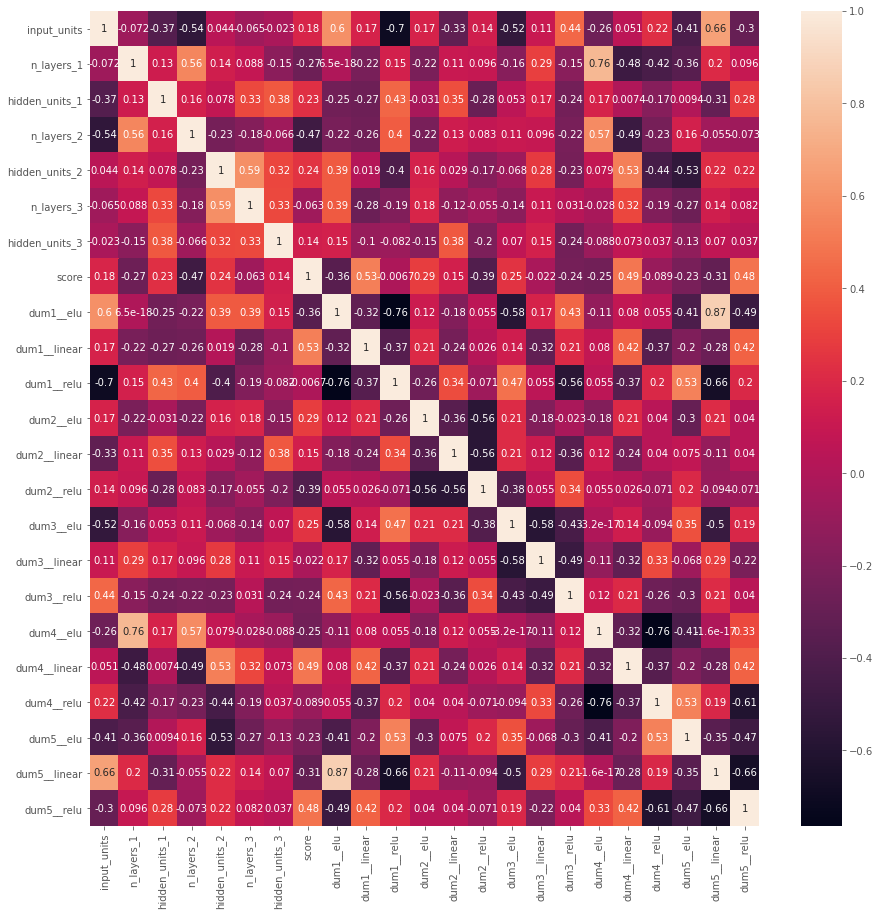

In [14]:
dum_vals = pd.get_dummies(resul, prefix=['dum1_','dum2_','dum3_','dum4_','dum5_'])
corrMatrix = dum_vals.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [15]:
mejor_modelo = tuner.get_best_models(num_models=1)[0]
predictions = mejor_modelo.predict([inp0_, inp1_, inp2_, inp3_, inp4_])

In [ ]:
import pickle
with open(f"tuner_{int(time.time())}.pkl", "wb") as f:
    pickle.dump(tuner, f)

In [ ]:
from tensorflow.keras.callbacks import TensorBoard
import datetime
logdir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = TensorBoard(log_dir= logdir)

history=model_m1.fit([inp0, inp1, inp2, inp3, inp4], outp1, 
                  epochs=50, 
                  verbose=1,
                  validation_split=0.2,
                  callbacks=[tensorboard])

predictions = model_m1.predict([inp0_, inp1_, inp2_, inp3_, inp4_])

In [ ]:
# max([np.abs(pr-pra) for pr, pra in predictions])
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# aa = [y for x, y in zip(y_test,range(len(y_test))) if x[0]<10 and x[1]>90]
# print(aa)
# print(predictions[aa[0]])
# print(y_test[aa[0]])
# print(np.mean(X_test[aa[0]][0]))
# sns.distplot(X_test[aa[0]][0])

4.791607725332186
5.640685217873854


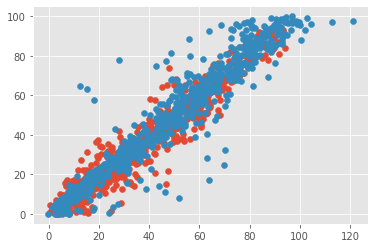

In [18]:
pred = [x[0] for x in predictions.tolist()]
y_t = [y[0] for y in y_test]

plt.scatter(pred,y_t)
print(mean_absolute_error(pred,y_t))


pred = [x[1] for x in predictions.tolist()]
y_t = [y[1] for y in y_test]

plt.scatter(pred,y_t)
print(mean_absolute_error(pred,y_t))

4.78835288036387
6.263773115386266


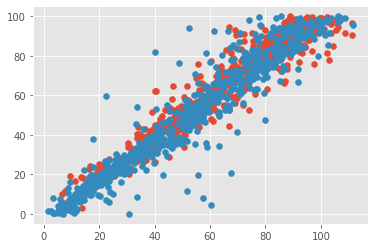

In [27]:
pred = [x[2] for x in predictions.tolist()]
y_t = [y[2] for y in y_test]

plt.scatter(pred,y_t)
print(mean_absolute_error(pred,y_t))


pred = [x[3] for x in predictions.tolist()]
y_t = [y[3] for y in y_test]

plt.scatter(pred,y_t)
print(mean_absolute_error(pred,y_t))

In [22]:
pvals = [] 
def resul(x1, x2):
  pval_ad = stats.anderson_ksamp([x1,x2]).significance_level
  pval_ks = stats.ks_2samp(x1, x2).pvalue
  return (pval_ad, pval_ks)
  
for i in range(len(y_test)):
  parms = y_test[i]
  predictions[i]
  m1, s1, m2, s2 = (parms[0], parms[1], parms[2],parms[3])
  x1 = np.random.normal(m1, s1,size=1000).tolist() + np.random.normal(m2, s2,size=1000).tolist()
  m1, s1, m2, s2 = (predictions[i][0],predictions[i][1],predictions[i][2],predictions[i][3])
  if s1<0:
    s1 = 1
  if s2<0:
    s2 = 1
  x2 = np.random.normal(m1, s1,size=1000).tolist() + np.random.normal(m2, s2,size=1000).tolist()
  pvals.append(resul(x1, x2))

pd.DataFrame({'AD': [x[0] for x in pvals], 'KS': [x[1] for x in pvals]}).describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: p-value floored: true value smaller than 0.001
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: p-value capped: true value larger than 0.25
  This is separate from the ipykernel package so we can avoid doing imports until


,AD,KS
count,660.000000,6.600000e+02
mean,0.073517,1.467555e-01
std,0.096199,2.317859e-01
min,0.001000,3.573144e-145
25%,0.001000,2.511820e-04
50%,0.015312,2.646763e-02
75%,0.142840,1.848857e-01
max,0.250000,9.958990e-01


In [ ]:
## Ejemplo pedorro

# import numpy as np
# from tensorflow import keras
# from tensorflow.keras import layers


# inputA = layers.Input(shape=(2,))
# xA = layers.Dense(8, activation='relu')(inputA)

# inputB = layers.Input(shape=(3,))
# xB = layers.Dense(8, activation='relu')(inputB)

# merged = layers.Concatenate()([xA, xB])

# output = layers.Dense(1, activation='linear')(merged)    

# model = keras.Model(inputs=[inputA, inputB], outputs=output)

# a = np.array([[1, 2], [2,3], [4,6]])#.reshape(1,-1)
# b = np.array([[3, 4, 5], [6,8,3], [35,2,43]])#.reshape(1,-1)

# model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
# model.fit([a,b], np.array([0,1,2]), epochs=2)


# model.predict([a, b])

# Ideas por agregar:


*   Calcular por tipo de Bimodalidad YA
*   Calcular agregando percentiles y estadísticos YA
*   Hiperparametrizar las hidden layers



In [ ]:
for v in dir(): del globals()[v]

In [ ]:
# COLS = list(range(0,500*2-1))+['mu_1','sigma_1','mu_2','sigma_2']
# df = pd.DataFrame(columns=COLS)

evidencia = []
resultados = []

for i in range(500):
  mu1, sigma1 = np.random.uniform(low=0, high=50, size=2)
  mu2, sigma2 = np.random.uniform(low=50, high=100, size=2)
  s1 = np.random.normal(mu1, sigma1, 250).tolist()
  s2 = np.random.normal(mu2, sigma2, 250).tolist()
  valor = sorted(s1+s2)
  dplot = sns.distplot(valor, kde=True, bins = 45)
  coords = dplot.get_lines()[0].get_data()
  barras = [h.get_height() for h in dplot.patches]
  plt.close()

  evidencia.append([valor,
                    coords[0],
                    coords[1],
                    np.array(barras)
                    ])
  resultados.append([mu1, sigma1, mu2, sigma2])

In [ ]:
X = evidencia
y = resultados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
input0 = Input(shape=(len(valor),))
input1 = Input(shape=(len(coords[1]),))
input2 = Input(shape=(len(coords[1]),))
input3 = Input(shape=(len(barras),))
inputs_ = [input0, input1, input2, input3]
merged = Concatenate(axis=1)(inputs_)
dense1 = Dense(328, input_dim=4, kernel_initializer='normal', activation='relu')(merged)#, activation='sigmoid', use_bias=True
dense2 = Dense(64, activation='relu')(dense1)
dense3 = Dense(32, activation='relu')(dense2)
dense41 = Dense(16, activation='relu')(dense3)
dense4 = Dense(8, activation='relu')(dense41)
output = Dense(1, activation='linear')(dense4)
model10 = keras.models.Model(inputs=inputs_, outputs=output)
model10.summary()

Model: "model_40"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_131 (InputLayer)          [(None, 500)]        0                                            
__________________________________________________________________________________________________
input_132 (InputLayer)          [(None, 200)]        0                                            
__________________________________________________________________________________________________
input_133 (InputLayer)          [(None, 200)]        0                                            
__________________________________________________________________________________________________
input_134 (InputLayer)          [(None, 45)]         0                                            
___________________________________________________________________________________________

In [ ]:
inp0=[]
inp1=[]
inp3=[]
inp2=[]

for a in X_train:
  inp0.append(a[0])
  inp1.append(a[1].tolist())
  inp2.append(a[2].tolist())
  inp3.append(a[3].tolist())

outp1 = []

for b in y_train:
  outp1.append([b[3]])

inp0 = np.array(inp0)
inp1 = np.array(inp1)
inp2 = np.array(inp2)
inp3 = np.array(inp3)

outp1 = np.asarray(outp1)

In [ ]:
from tensorflow.keras.callbacks import TensorBoard
import datetime
logdir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = TensorBoard(log_dir= logdir)

model10.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

history=model10.fit([inp0, inp1, inp2, inp3], outp1, 
                  epochs=40, 
                  verbose=1,
                  validation_split=0.2,
                  callbacks=[tensorboard])

# predictions = model10.predict((X_test))

Epoch 1/40
9/9 [==============================] - 1s 53ms/step - loss: 5983.1259 - mse: 5983.1259 - mae: 58.9152 - val_loss: 63.5841 - val_mse: 63.5841 - val_mae: 5.9299
Epoch 2/40
9/9 [==============================] - 0s 8ms/step - loss: 49.9772 - mse: 49.9772 - mae: 5.4989 - val_loss: 63.6718 - val_mse: 63.6718 - val_mae: 6.3027
Epoch 3/40
9/9 [==============================] - 0s 8ms/step - loss: 65.1412 - mse: 65.1412 - mae: 6.4004 - val_loss: 72.4682 - val_mse: 72.4682 - val_mae: 6.4402
Epoch 4/40
9/9 [==============================] - 0s 8ms/step - loss: 56.4972 - mse: 56.4972 - mae: 5.9534 - val_loss: 59.5867 - val_mse: 59.5867 - val_mae: 5.7315
Epoch 5/40
9/9 [==============================] - 0s 8ms/step - loss: 45.6416 - mse: 45.6416 - mae: 5.3411 - val_loss: 51.8753 - val_mse: 51.8753 - val_mae: 5.3572
Epoch 6/40
9/9 [==============================] - 0s 8ms/step - loss: 41.5979 - mse: 41.5979 - mae: 5.1251 - val_loss: 51.7307 - val_mse: 51.7307 - val_mae: 5.8338
Epoch 7/40

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs/fit

## TEST Bondad y Ajuste

In [ ]:
from scipy import stats
import numpy as np

In [ ]:
x1 = np.random.normal(size=10000)
x2 = np.random.normal(size=10000)

def resul(x1, x2):
  pval_ad = stats.anderson_ksamp([x1,x2]).significance_level
  pval_ks = stats.ks_2samp(x1, x2).pvalue
  return (pval_ad, pval_ks)

# Corrección percentil 50

In [71]:
pvals = [] 
def resul(x1, x2):
  pval_ad = stats.anderson_ksamp([x1,x2]).significance_level
  pval_ks = stats.ks_2samp(x1, x2).pvalue
  return (pval_ad, pval_ks)
  
for i in range(len(y_test)):
  parms = y_test[i]
  predictions[i]
  m1, s1, m2, s2 = (parms[0], parms[1], parms[2],parms[3])
  x1 = np.random.normal(m1, s1,size=4000).tolist() + np.random.normal(m2, s2,size=4000).tolist()
  m1_, s1_, m2_, s2_ = (predictions[i][0],predictions[i][1],predictions[i][2],predictions[i][3])
  if s1_<0:
    s1_ = 1
  if s2_<0:
    s2_ = 1
  x2 = np.random.normal(m1_, s1_,size=4000).tolist() + np.random.normal(m2_, s2_,size=4000).tolist()
  pvals.append(list(resul(x1, x2)) + [m1-m1_, s1-s1_, m2-m2_, s2-s2_, m1, s1, m2, s2, m1_, s1_, m2_, s2_])

Resultados = pd.DataFrame({'AD': [x[0] for x in pvals], 
              'KS': [x[1] for x in pvals], 
              'm1': [x[2] for x in pvals], 
              's1': [x[3] for x in pvals], 
              'm2': [x[4] for x in pvals], 
              's2': [x[5] for x in pvals], 
              'm1_o1': [x[6] for x in pvals], 
              's1_o1': [x[7] for x in pvals], 
              'm2_o1': [x[8] for x in pvals], 
              's2_o1': [x[9] for x in pvals], 
              'm1_o2': [x[10] for x in pvals], 
              's1_o2': [x[11] for x in pvals], 
              'm2_o2': [x[12] for x in pvals], 
              's2_o2': [x[13] for x in pvals], 
              })

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: p-value floored: true value smaller than 0.001
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: p-value capped: true value larger than 0.25
  This is separate from the ipykernel package so we can avoid doing imports until


### Para qué tipo de distribuciones no ajusta el ks/ad test

In [72]:
Resultados['Max_dif'] = [max([abs(a),abs(b),abs(c),abs(d)]) for  a, b, c, d in zip(Resultados['m1'],Resultados['s1'],Resultados['m2'],Resultados['s2'])]
Resultados['Max_m'] = [max([abs(a),abs(c)]) for  a, b, c, d in zip(Resultados['m1'],Resultados['s1'],Resultados['m2'],Resultados['s2'])]
Resultados['Max_s'] = [max([abs(b),abs(d)]) for  a, b, c, d in zip(Resultados['m1'],Resultados['s1'],Resultados['m2'],Resultados['s2'])]

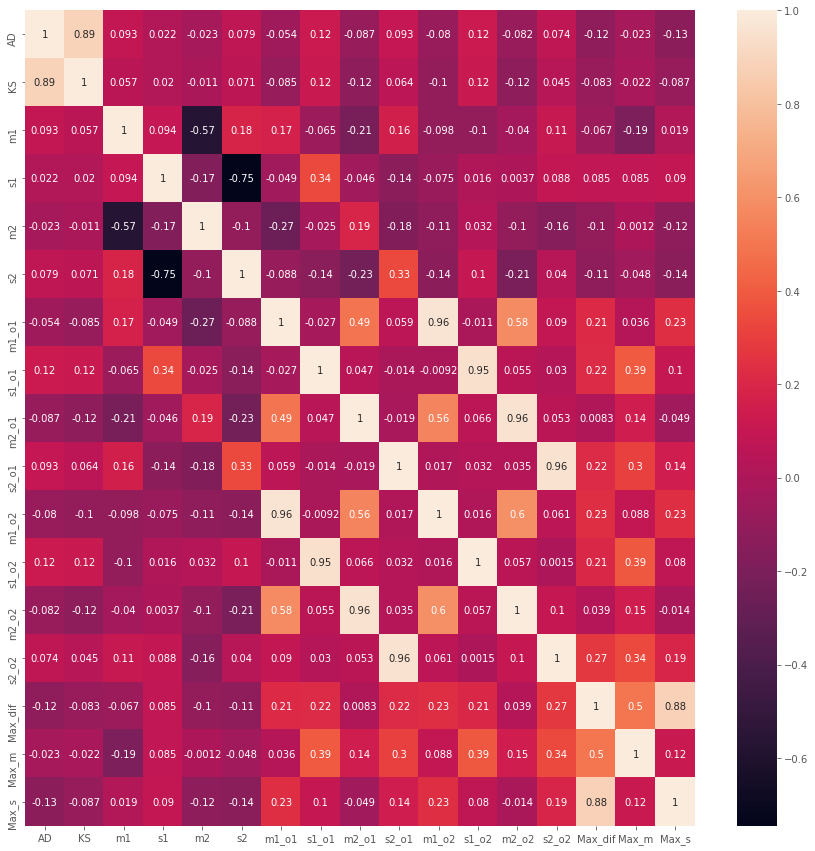

In [73]:
dum_vals = Resultados
corrMatrix = dum_vals.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corrMatrix, annot=True)
plt.show()

Entre mayor es la diferencia en la desviación estardar, peor es el ajuste, lo mismo para la media pero tiende a ser más exacta

In [77]:
bottom_10 = Resultados.sort_values('KS').head(10)
top_10 = Resultados.sort_values('KS', ascending=False).head(10)

In [114]:
# parms_originales
from sympy.stats import Normal
from sympy import *

from sklearn.mixture import GaussianMixture
from scipy.stats import norm

In [148]:
bottom_10.sort_index(inplace=True)
top_10.sort_index(inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


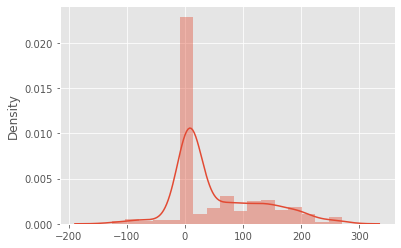

In [156]:
sns.distplot(samples[i])
  

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


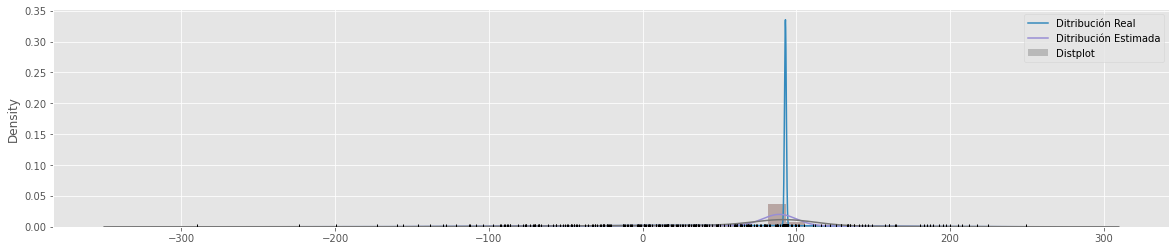

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


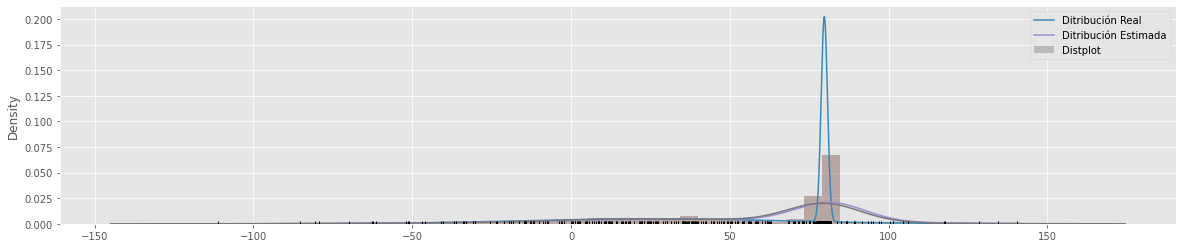

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


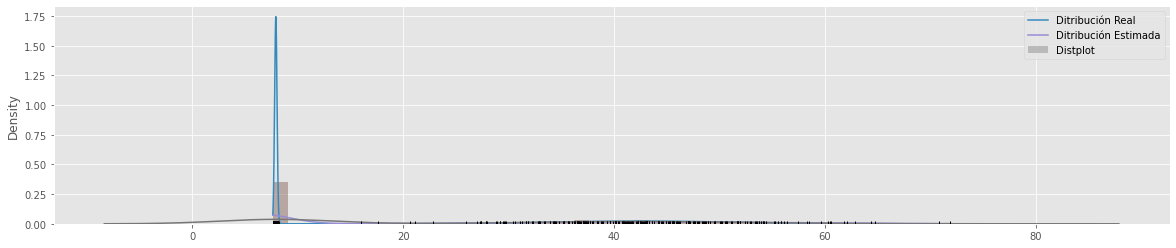

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


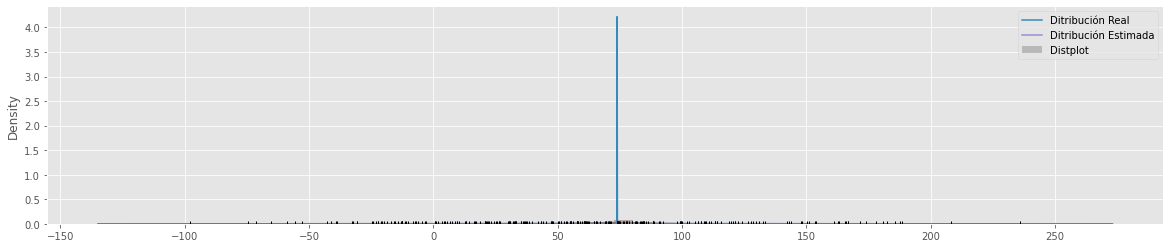

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


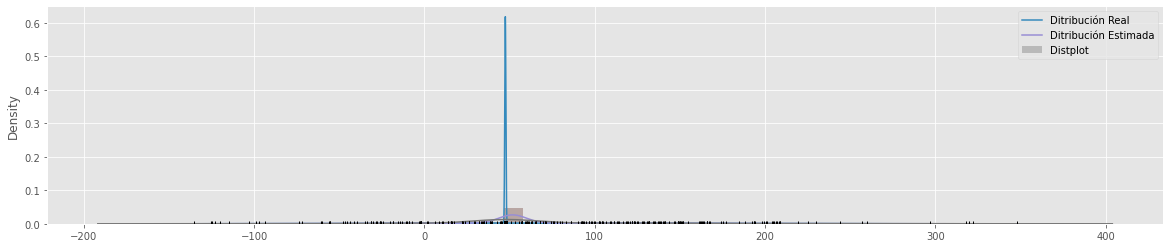

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


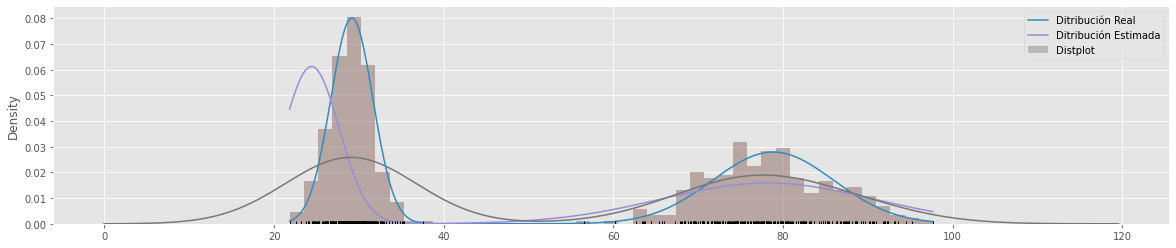

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


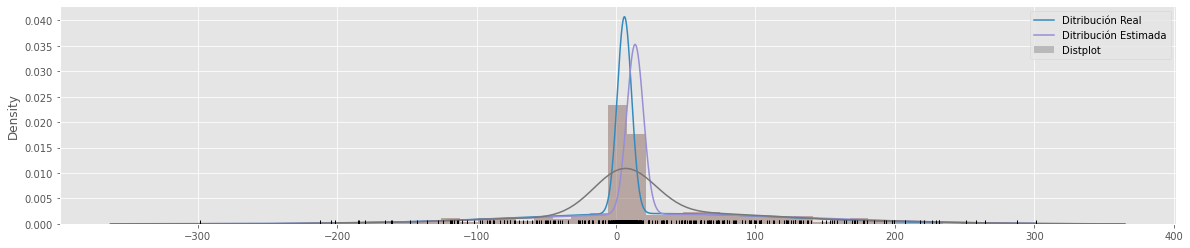

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


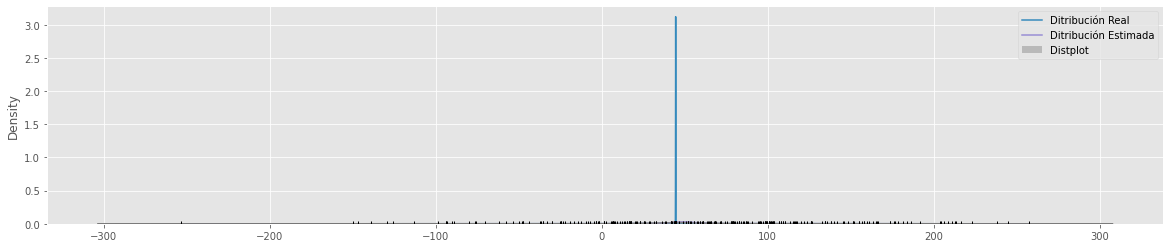

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


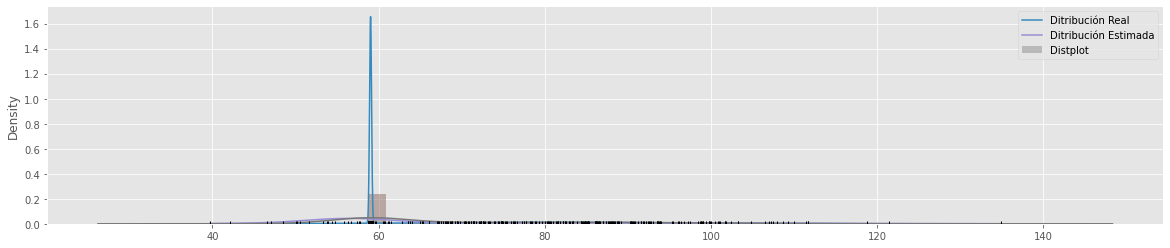

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


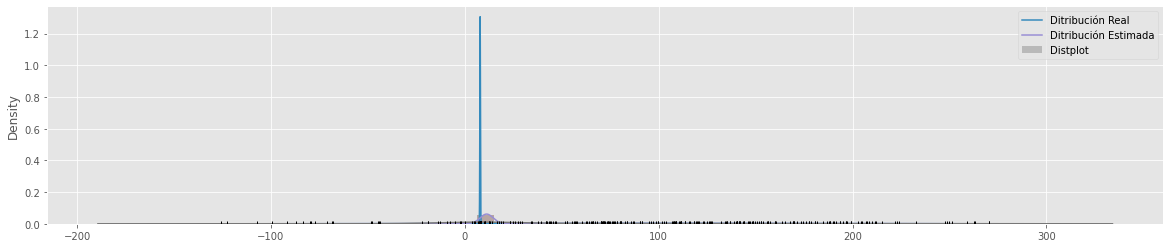

In [161]:
## Plot bottom 10
min_max_samples = [(min(x[0]), max(x[0])) for x, y in zip(X_test, range(len(X_test))) if y in bottom_10.index.tolist()]
samples = [x[0] for x, y in zip(X_test, range(len(X_test))) if y in bottom_10.index.tolist()]

def mix_pdf(x, loc, scale, weights):
    d = np.zeros_like(x)
    for mu, sigma, pi in zip(loc, scale, weights):
        d += pi * norm.pdf(x, loc=mu, scale=sigma)
    return d

for i in range(len(bottom_10)):
  parms_originales = bottom_10[['m1_o1','s1_o1','m2_o1','s2_o1']].iloc[i,:]
  parms_estimados = bottom_10[['m1_o2','s1_o2','m2_o2','s2_o2']].iloc[i,:]
  mu = (parms_originales[0], parms_originales[2])
  sigma = (parms_originales[1], parms_originales[3])
  mu_ = (parms_estimados[0], parms_estimados[2])
  sigma_ = (parms_estimados[1], parms_estimados[3])
  pi = (.5,.5)
  grid = np.arange(min_max_samples[i][0], min_max_samples[i][1], 0.01)

  plt.subplots(figsize=(20,4))
  plt.hist(samples[i], bins=45, density=True, alpha=0.2)
  ### Original
  plt.plot(grid, mix_pdf(grid, mu, sigma, pi), label='Ditribución Real')
  ###
  plt.plot(grid, mix_pdf(grid, mu_, sigma_, pi), label='Ditribución Estimada')
  sns.distplot(samples[i], label='Distplot', kde=True, bins = 45)

  plt.plot(samples[i], [0.0001]*len(samples[i]), '|', color='k')
  plt.legend(loc='upper right')
  plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


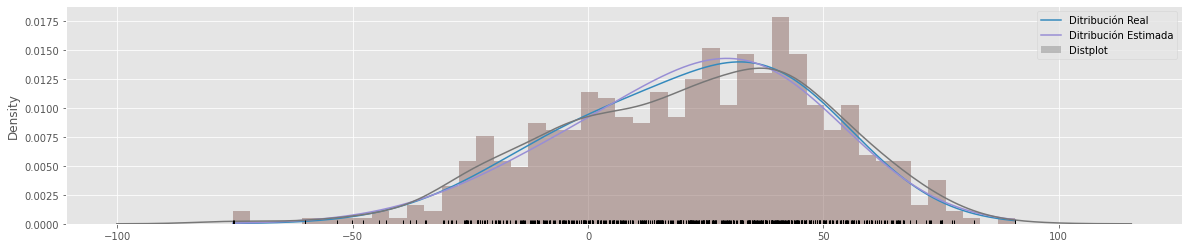

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


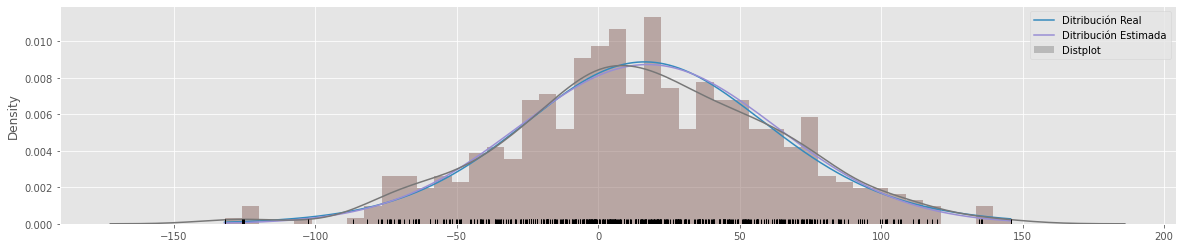

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


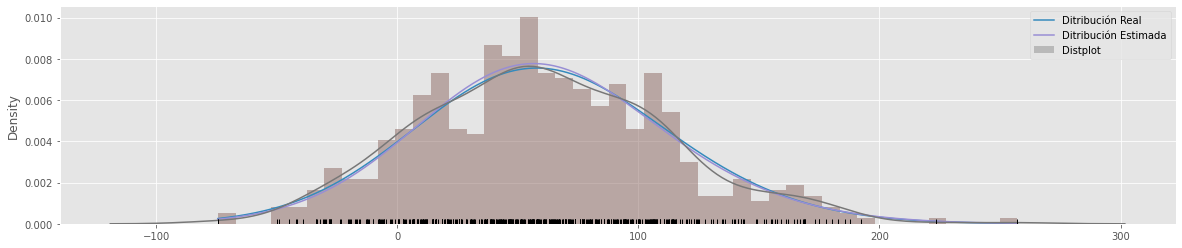

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


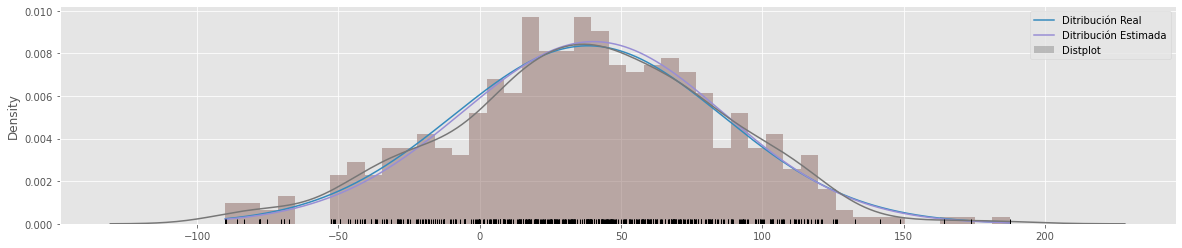

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


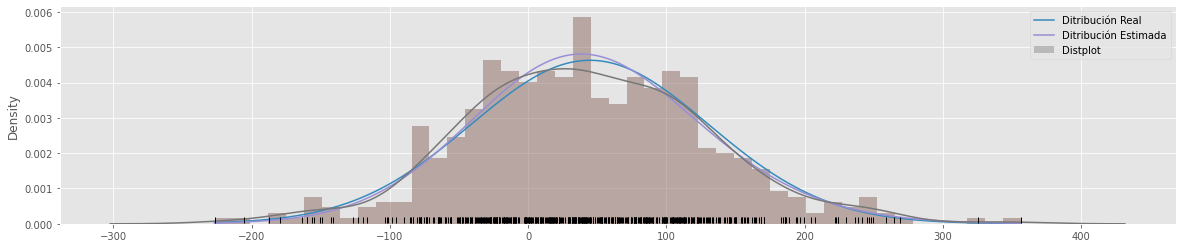

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


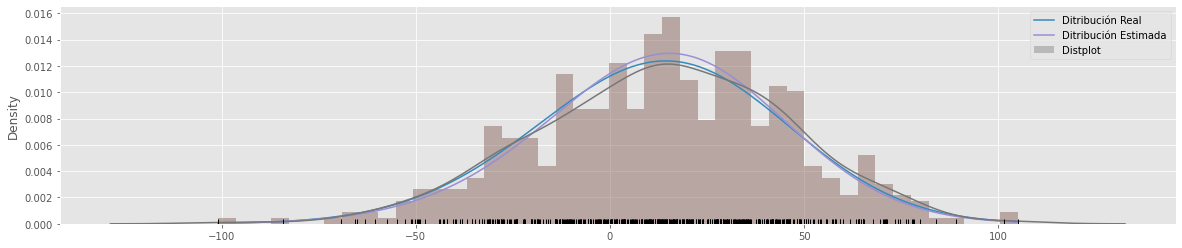

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


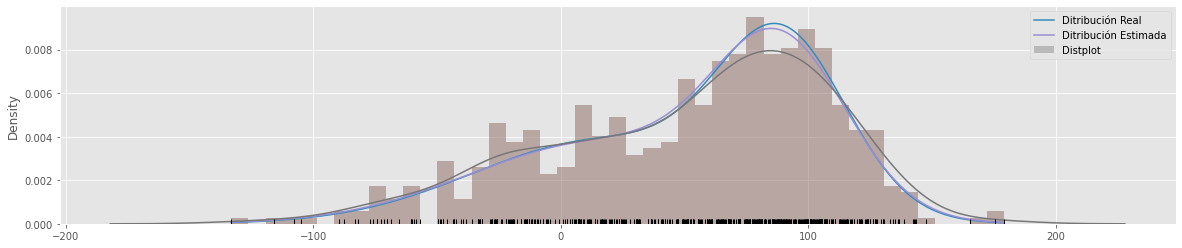

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


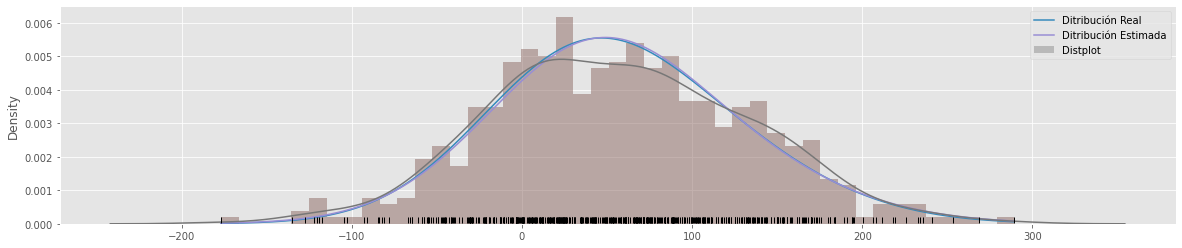

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


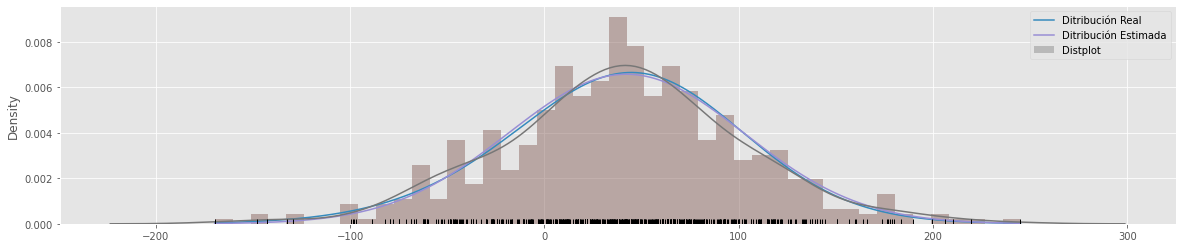

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


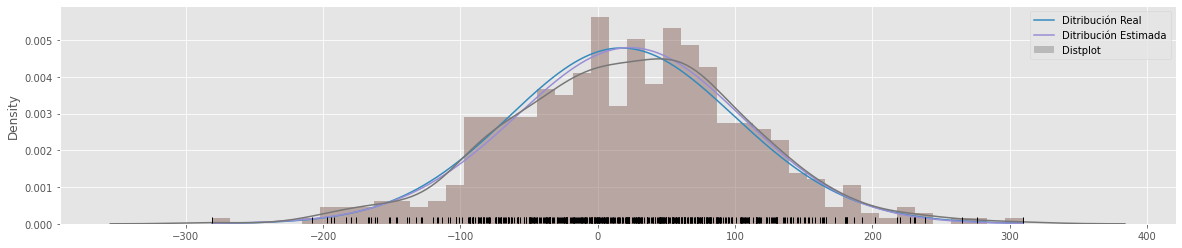

In [160]:
## Plot bottom 10
min_max_samples = [(min(x[0]), max(x[0])) for x, y in zip(X_test, range(len(X_test))) if y in top_10.index.tolist()]
samples = [x[0] for x, y in zip(X_test, range(len(X_test))) if y in top_10.index.tolist()]

def mix_pdf(x, loc, scale, weights):
    d = np.zeros_like(x)
    for mu, sigma, pi in zip(loc, scale, weights):
        d += pi * norm.pdf(x, loc=mu, scale=sigma)
    return d

for i in range(len(top_10)):
  parms_originales = top_10[['m1_o1','s1_o1','m2_o1','s2_o1']].iloc[i,:]
  parms_estimados = top_10[['m1_o2','s1_o2','m2_o2','s2_o2']].iloc[i,:]
  mu = (parms_originales[0], parms_originales[2])
  sigma = (parms_originales[1], parms_originales[3])
  mu_ = (parms_estimados[0], parms_estimados[2])
  sigma_ = (parms_estimados[1], parms_estimados[3])
  pi = (.5,.5)
  grid = np.arange(min_max_samples[i][0], min_max_samples[i][1], 0.01)

  plt.subplots(figsize=(20,4))
  plt.hist(samples[i], bins=45, density=True, alpha=0.2)
  ### Original
  plt.plot(grid, mix_pdf(grid, mu, sigma, pi), label='Ditribución Real')
  ###
  plt.plot(grid, mix_pdf(grid, mu_, sigma_, pi), label='Ditribución Estimada')
  sns.distplot(samples[i], label='Distplot', kde=True, bins = 45)

  plt.plot(samples[i], [0.0001]*len(samples[i]), '|', color='k')
  plt.legend(loc='upper right')
  plt.show()